# <center> Econ 373: Computational Economics (with Python) </center>
## <center> Homework 8 (group) </center>

# <font color='red'>Names:</font>Danhe Tang, Alan Janes, Yuanhang Peng, Ben Petrie, Alex Rodriguez

# <font color='red'>Instructions:</font>
- Save all of your code to a .ipynb file (jupyter notebook file) and name it as **username_hw8.ipynb**. 
    - **You should remove any test cells/code that is outside of functions.**
    - Submit only username_hw8.ipynb file
- For each question, your file should contain a function labeled **q#** with input/output requirements specified below. 
    - The input refers to the arguments passed to the function. 
    - The output refers to what is returned by the function.
    - We may require output to file or screen within a function, but if that is the case it will be clearly specified.
    - Your functions may call other functions or classes that you create, but they have to be included in the file (i.e., the file that you submit should be self-contained).
    - If your function calls on functions from other libraries, you need to load them within the function (e.g., if you use the os library you should assume that it has been installed on the computer but it has not been imported before calling your function).
    

## Grading

- We will run your file by clicking Kernel--> Restart and Run All. You file should be able to reproduce all the results stored in your jupyter file. 

- We may also run your code by specifying q#(arg) in an empty cell. It should reproduce your stored results. 

Each question is graded on a 3-point scale + 1 point for following the instructions 
- 0 -- no or minimal work submitted (e.g., minor modification of the 'starting point')
- 1 -- some work done but there are errors running/executing the code or results are mostly incomplete
- 2 -- code runs, but results are either somewhat incomplete, incorrect, or there is clear room for improvement (e.g., no comments in the code, graphs are not labelled, etc.) 
- 3 -- all results complete and correct with clear commented code 

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import os
# To find your working directory:
%pwd 
# Code in case you want to change your working directory:  %cd
# for example: %cd "C:\Users\\Purdue\ComputationalEconomicsECON320\Week3_4\Group\"
# Define your data folder here:
datafolder = 'C:\\Users\\Tang\\Documents\\ECON373\\W8&9\\HW8'
# Please use an absolute path
outputfolder= 'C:\\Users\\Tang\\Documents\\ECON373\\W8&9\\HW8'

# Question 1: Analyzing Stock Volatility and Risk

Understanding a stock's historical volatility is important for assessing investment risk. Stocks with stable prices have low volatility, while highly volatile stocks are riskier but may offer higher returns. There are various ways to measure volatility, with the most common being the standard deviation of a stock's price. However, this doesn't provide a comparison to the risk of the entire market. To gauge a stock's relative volatility, traders rely on what is known as the Beta coefficient.

In this homework question, we will write a function to calculate a simplified version of the Beta coefficient and compare the Beta coefficients of two prominent healthcare stocks. Our goal is to assess the riskiness of these stocks and determine the significance of the difference using a permutation test.

**Data:** You will use the "StockPrice_5Year_Weekly.csv" file, which contains weekly price data for the S&P 500, Pfizer, and Johnson Group. We will consider the S&P 500 as the market benchmark.

**Function Input:** None

**Function Output:**
Three numbers:
    1. Average quarterly Beta coefficient for Pfizer 
    2. Average quarterly Beta coefficient for Johnson Group
    3. p-value of two sided permutation test

To calculate the Beta coefficient for a stock, follow these steps:

1. Calculate the weekly return for all three stocks, denoted as $R_{SP500}$, $R_{Pfizer}$, and $R_{Johnson}$:

   $$ R_{stock} = \ln\left(\frac{price_{t}}{price_{t-1}}\right)$$

2. Calculate the quarterly Beta coefficients for Pfizer and Johnson using the S&P 500 as the benchmark. The Beta coefficient is defined as:

   $$ \beta = \frac{Covariance(R_{benchmark}, R_{stock})}{Variance(R_{benchmark})} $$

3. Once you've calculated the Beta coefficients, test whether the median quarterly Beta coefficient of Pfizer differs from the median quarterly Beta coefficient of Johnson. Use a permutation test to generate 10,000 random permutations for each group.

Reference: [Investopedia - Beta](https://www.investopedia.com/terms/b/beta.asp)

[Example of calculating the Beta coefficient in excel](https://financetrainingcourse.com/education/2011/04/market-risk-metrics--beta-with-respect-to-market-indices/)

Below, you will also find a sample code to calculate the Beta coefficient in Python. Feel free to modify the code for your calculation. 

### Aside: simple return vs. logarithm return

There are two methods of calculating returns:

1. **Logarithmic Return**:
$$ LR_{stock} = \ln\left(\frac{price_{t}}{price_{t-1}}\right) $$

This formula calculates the natural logarithm of the ratio of the current price to the previous price. This gives you the continuously compounded return over the period.

2. **Simple Return (+ Log Approximation)**:
$$ R_{stock} = \frac{price_{t} - price_{t-1}}{price_{t-1}} $$
$$ LR_{stock} = \ln(R_{stock}+1) $$

The first line calculates the simple percentage change or the simple return. The second line then applies the natural logarithm to the result of the simple return plus one (i.e., if the percentage change is 5\% then you get return of 1.05).

The conceptual difference:

- The first formula (logarithmic return) directly uses the ratio of prices to calculate the return. This is the true continuously compounded return.
  
- The second method first calculates the simple return and then attempts to convert it into its log return counterpart using the transformation \(\ln(1 + \text{simple return})\). For small values of the simple return, the transformation provides an approximation of the true log return. This step bridges the gap between simple and log returns, making it easier to switch between the two, especially when dealing with datasets that already provide simple returns.

The two methods will yield close but not identical results, especially when returns are larger. The direct logarithmic return method is generally more accurate for financial analysis that requires compounding or when working with statistical methods assuming normality. On the other hand, the approximation method can be handy when you start with simple returns but need to perform analyses that are better suited for log returns.

#### Some advantages of log returns:

Logarithm of the price ratio is associated with some convenient properties:

1. **Compounding**: Logarithmic returns are time-additive. If you have daily log returns, you can sum them over a period to get the return for the period. This is not the case with simple returns (percent difference). For instance, if you want to calculate monthly returns from daily returns, with log returns you'd simply sum them, but with simple returns, you'd have to multiply them.
   
2. **Symmetry**: Log returns are symmetric. This means that a 10% increase in a stock (e.g., from 100 to 110) followed by a 10% decrease (from 110 back to 100) will sum up to zero. This isn't the case with simple returns.

3. **Small Changes Approximation**: For small return values, the log return is approximately equal to the simple return. This can make interpretations and mathematical derivations easier under certain circumstances.

4. **Statistical Properties**: Log returns are more amenable to statistical analysis because they are more likely to be normally distributed, especially when returns are small. This is beneficial when using techniques that assume normality.

5. **Analytical Convenience in Continuous Compounding**: When we use stochastic calculus (in financial mathematics, e.g., Black-Scholes formula for option pricing), we often deal with continuously compounded rates of return. Log returns align better with the continuous compounding framework.

Both types of return have their uses in financial analysis, and the choice often depends on the specific application and the desired properties. For many statistical analyses and modeling purposes, log returns are preferred. However, for interpretability and direct understanding, especially in reports meant for a general audience, simple returns might be more commonly used.

In [4]:
import pandas as pd
import numpy as np
import os

In [6]:
# Sample code to calculate the Beta coefficient; Assume we have the following 9 weeks prices for a stock and the market index
Stock_Price = [20,35,40,37,22,34,55,35,42]
Market_Price = [300, 340, 400, 320, 200, 300, 500, 380, 400]

# It returns the percentage change between the current and a prior element
PC_stock = (pd.Series(Stock_Price)/pd.Series(Stock_Price).shift(1)).dropna()
PC_market = (pd.Series(Market_Price)/pd.Series(Market_Price).shift(1)).dropna()
Return_stock = np.log(PC_stock)
Return_market = np.log(PC_market)

# Calculate the beta coefficient
# You can use the command np.cov to obtain the covariance and the variance for these two stocks
cov_matrix = np.cov(Return_stock, Return_market)
beta_month1 = cov_matrix[0,1] / cov_matrix[1,1]
beta_month1

1.095164648430575

The two sided test p-value is 0.0473


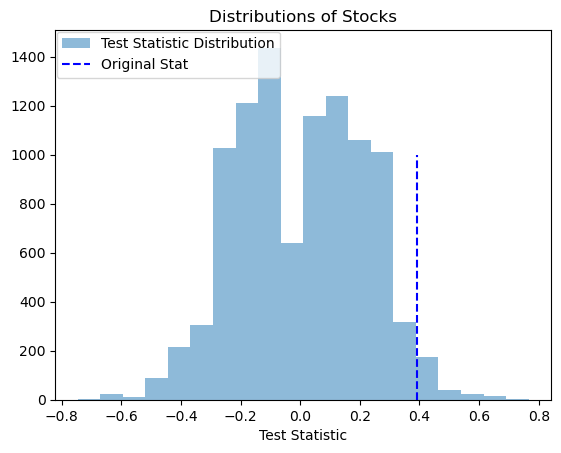

In [8]:
def q1():
    #opening the csv and making lists 3 stocks
    data= pd.read_csv("StockPrice_5Year_Weekly.csv")
    bench=data["S&P 500"]
    pfiz=data['Pfizer']
    john=data['Johnson']
    #calculating weekly return of stocks
    b=[]
        #the commas in this set mess up the code later
    for i in range(261):
        j=bench[i].replace(",","")
        b.append(float(j))
    
    bmark = pd.Series(b).pct_change().dropna()
    Pfiz = pd.Series(pfiz).pct_change().dropna()
    json = pd.Series(john).pct_change().dropna()
    Return_bmark = np.log(bmark+1)
    Return_Pfiz = np.log(Pfiz+1)
    Return_json = np.log(json+1)
    
    #Pfiz monthly beta
    Pf=[]
    for i in range(65):
        start=4*i
        end=start+4
        cov_matrix = np.cov(Return_Pfiz[start:end], Return_bmark[start:end])
        month = cov_matrix[0,1] / cov_matrix[1,1]
        Pf.append(month)
    #Johnson montly beta
    Js=[]
    for i in range(65):
        start=4*i
        end=start+4
        cov_matrix = np.cov(Return_json[start:end], Return_bmark[start:end])
        month = cov_matrix[0,1] / cov_matrix[1,1]
        Js.append(month)
    #75th percentile
    pfi75=(np.percentile(Pf,75))
    jon75=(np.percentile(Js,75))
    #difference in percentile
    diff=pfi75-jon75
    #combined list
    PFJS=np.append(Pf,Js)
    #permutation test
    n1=len(Pf)
    n = len(PFJS)
    leng = np.arange(n)
    perm = []
    for i in range(10000):
        np.random.shuffle(leng)
        p = np.percentile(PFJS[leng][:n1],75) - np.percentile(PFJS[leng][n1:],75)
        perm.append(p)
    
    #graph
    fig, ax = plt.subplots()
    ax.set_title('Distributions of Stocks')

    plt.hist(perm,20,alpha=0.5, label='Test Statistic Distribution')
    plt.plot([diff, diff], [0, 10000/10], 'b--', label='Original Stat') 
    plt.xlabel('Test Statistic')
    plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.1)
    plt.savefig('tang631_hw8_q1.pdf')

    
    #p-value
    count=(np.abs(perm)>=np.abs(diff)).sum()
    p_val=np.round((count+1)/(1+10000),4)
    return(print("The two sided test p-value is", p_val))
q1()

In [ ]:
def q1():
    #opening the csv and making lists 3 stocks
    data= pd.read_csv("StockPrice_5Year_Weekly.csv")
    bench=data["S&P 500"]
    pfiz=data['Pfizer']
    john=data['Johnson']
    #calculating weekly return of stocks
    b=[]
        #the commas in this set mess up the code later
    for i in range(261):
        j=bench[i].replace(",","")
        b.append(float(j))
   
    bmark = pd.Series(b).pct_change().dropna()
    Pfiz = pd.Series(pfiz).pct_change().dropna()
    json = pd.Series(john).pct_change().dropna()
    Return_bmark = np.log(bmark+1)
    Return_Pfiz = np.log(Pfiz+1)
    Return_json = np.log(json+1)
   
    #Pfiz monthly beta
    Pf=[]
    for i in range(65):
        start=4*i
        end=start+4
        cov_matrix = np.cov(Return_Pfiz[start:end], Return_bmark[start:end])
        month = cov_matrix[0,1] / cov_matrix[1,1]
        Pf.append(month)
    #Johnson montly beta
    Js=[]
    for i in range(65):
        start=4*i
        end=start+4
        cov_matrix = np.cov(Return_json[start:end], Return_bmark[start:end])
        month = cov_matrix[0,1] / cov_matrix[1,1]
        Js.append(month)
    #75th percentile
    pfi75=(np.percentile(Pf,75))
    jon75=(np.percentile(Js,75))
    #difference in percentile
    diff=pfi75-jon75
    #combined list
    PFJS=np.append(Pf,Js)
    #permutation test
    n1=len(Pf)
    n = len(PFJS)
    leng = np.arange(n)
    perm = []
    for i in range(10000):
        np.random.shuffle(leng)
        p = np.percentile(PFJS[leng][:n1],75) - np.percentile(PFJS[leng][n1:],75)
        perm.append(p)
   
    #graph
    fig, ax = plt.subplots()
    ax.set_title('Distributions of Stocks')

    plt.hist(perm,20,alpha=0.5, label='Test Statistic Distribution')
    plt.plot([diff, diff], [0, 10000/10], 'b--', label='Original Stat')
    plt.xlabel('Test Statistic')
    plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.1)
    plt.savefig('tang631_hw8_q1.pdf')

   
    #p-value
    count=(np.abs(perm)>=np.abs(diff)).sum()
    p_val=np.round((count+1)/(1+10000),4)
    return(print("The two sided test p-value is", p_val))
q1()

# Question 2
Using bootstrapping approach, create and plot the sampling distribution of the average GDP per capita data across the OECD countries in 2010 and mark the 95% confidence interval.

- **Input**: none
- **Output**: a pdf figure saved to file username_hw8_q2.pdf (saved to the output folder)
   - Make sure that your graph contains axis labels and proper legends

*Make sure that "gdppercapita.csv" is in the data folder. 


In [ ]:
def q2():

    oecd={'country':['Australia','Austria', 'Belgium', 'Canada','Chile','Colombia','Czech Republic','Denmark', 'Estonia',\
                             'Finland', 'France', 'Germany', 'Greece', 'Hungary','Iceland','Ireland','Israel','Italy', 'Japan', \
                             'South Korea','Latvia', 'Lithuania','Luxembourg', 'Mexico', 'Netherlands','New Zealand','Norway','Poland',\
                             'Portugal','Slovak Republic','Slovenia','Spain','Sweden','Switzerland','Turkey', 'United Kingdom','United States'],\
                  'join_year':[1971,1961, 1961, 1961,2010,2020,1995,1961, 2010, 1969, 1961, 1961, 1961, 1996,\
                    1961,1961,2010,1962, 1964,1996,2016, 2018,1961, 1994, 1961,1973,1961,1996,1961,\
                    2000,2010,1961,1961,1961,1961,1961,1961]}

    pass

In [11]:
def q2():
    oecd={'country':['Australia','Austria', 'Belgium', 'Canada','Chile','Colombia','Czech Republic','Denmark', 'Estonia',\
                         'Finland', 'France', 'Germany', 'Greece', 'Hungary','Iceland','Ireland','Israel','Italy', 'Japan', \
                         'South Korea','Latvia', 'Lithuania','Luxembourg', 'Mexico', 'Netherlands','New Zealand','Norway','Poland',\
                         'Portugal','Slovak Republic','Slovenia','Spain','Sweden','Switzerland','Turkey', 'United Kingdom','United States'],\
              'join_year':[1971,1961, 1961, 1961,2010,2020,1995,1961, 2010, 1969, 1961, 1961, 1961, 1996,\
                1961,1961,2010,1962, 1964,1996,2016, 2018,1961, 1994, 1961,1973,1961,1996,1961,\
                2000,2010,1961,1961,1961,1961,1961,1961]}

    data=pd.read_csv('gdppercapita.csv',index_col=0)
    data=data.loc[oecd['country'],:]


    dataIndex=pd.DataFrame(oecd,columns=['country','join_year'])
    dataIndex=dataIndex.set_index('country')
    dataIndex["2010"]=dataIndex['join_year']<=2010


    oecd2010=data[dataIndex]["2010"]
    print(oecd2010)
    oecd2010=oecd2010.dropna() 
    np.mean(oecd2010)
    oecd2010.shape[0]
    resampled_means = []
    for i in range(1000):
        
        random_resample_indices = np.random.randint(oecd2010.shape[0],size=oecd2010.shape[0]) 
        m = np.mean(oecd2010[random_resample_indices])
        resampled_means.append(m)
        
    #0.025 percentile
    low=np.percentile(resampled_means,2.5)
    #0.975 percentile
    high=np.percentile(resampled_means,97.5)
    
    plt.hist(resampled_means)
    plt.plot([low, low], [0, 200], 'r--') 
    plt.plot([high, high], [0, 200], 'r--') 
    plt.xlabel("gdp per capita")
    plt.ylabel("frequency")
    plt.savefig("tang631_hw8_q2.pdf")

country
Australia          41500.0
Austria            43300.0
Belgium            41100.0
Canada             40700.0
Chile              19400.0
Colombia               NaN
Czech Republic     28400.0
Denmark            44000.0
Estonia            22700.0
Finland            39800.0
France             36800.0
Germany            40400.0
Greece             28700.0
Hungary            22400.0
Iceland            40100.0
Ireland            43500.0
Israel             29700.0
Italy              36200.0
Japan              35800.0
South Korea        30400.0
Latvia                 NaN
Lithuania              NaN
Luxembourg         91700.0
Mexico             16200.0
Netherlands        46100.0
New Zealand        32200.0
Norway             62400.0
Poland             21800.0
Portugal           27200.0
Slovak Republic    25200.0
Slovenia           28700.0
Spain              32500.0
Sweden             43000.0
Switzerland        55900.0
Turkey             18000.0
United Kingdom     36500.0
United States      4

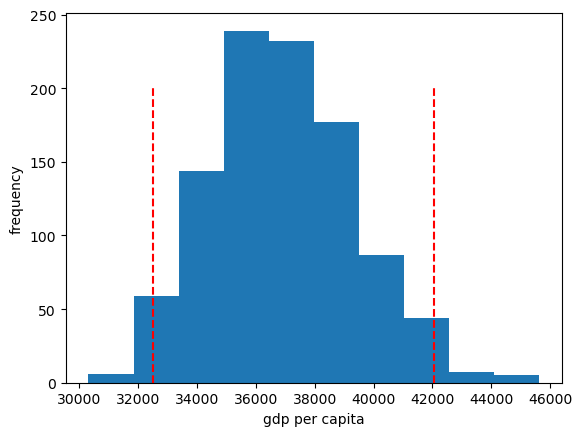

In [12]:
q2()

# Question 3
Suppose that the monthly economic growth is characterized by the following matrix:

\begin{equation*}
P =  \begin{vmatrix}
.95 & .04 & .01 \\
 .15&  .75 & .10  \\
 .01&  .49 & .50
\end{vmatrix}
\end{equation*}

Where the first state represents "normal growth", the second state represents "mild recession" and the third state represents "severe recession." For example, the matrix tells us that when the state is normal growth, the country will again experience normal growth next month with probability 0.95. Conditional on being in the state of economic growth, what is the probability of experiencing deep recession at least once over the next 12 months?

- **Input**: none
- **Output**: the probability



In [13]:
def q3():
    def my_mc_simulation(current_state, states, P, T=10000):
        chain = np.zeros(T,dtype=int)

        for t in range(0,T):
            chain[t] = current_state
            next_state = np.random.choice(states, p=P[current_state])
            current_state = next_state #moving to the next state

        return chain
    states = np.arange(3) #vector of states
    current_state = 0 #current state is economic growth
    T=12
    P = np.array([[0.95,0.04,0.01],[0.15,0.75,0.1],[0.01,0.49,0.5]])

    n_sim = 10000
    results = np.zeros((n_sim,T))
    for i in range(n_sim):
        results[i,:] = my_mc_simulation(current_state, states, P,T)
    count = 0
    for i in range(n_sim):
        if (results[i,:]==2).any():
            count+=1
    print(count/n_sim)
    return(count/n_sim)
q3()

0.1965


0.1965